In [53]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.model_selection import train_test_split

In [54]:
datax = pd.read_csv(filepath_or_buffer='C:/Users/weich/Google Drive/Rice University/3rd Semester/ELEC 578/HW5/moons/moons.x.csv', sep=',')
datay = pd.read_csv(filepath_or_buffer='C:/Users/weich/Google Drive/Rice University/3rd Semester/ELEC 578/HW5/moons/moons.y.csv', sep=',')

In [55]:
X_cor = list(datax['-1.1141'])
X_cor.insert(0, -1.1141)
Y_cor = list(datax['0.0113'])
Y_cor.insert(0, 0.0113)
X = np.zeros((len(X_cor), 2))
X[:,0] = X_cor
X[:,1] = Y_cor

y = list(datay['-1'])
y.insert(0, -1)
y = np.array(y)

In [56]:
# Problem 1.1
prob = np.ones(len(X))/len(X)
min_error = 100000000
best_stump = {}
pnVSnp = 0 #pn = 0, np = 1
for d in range(len(X[0])):
    sorted_index = np.argsort(X[:,d])
    # 0th iteration
    th0 = X[sorted_index[0]][d]
    threshold = th0
    phi0 = np.zeros(len(X))
    errorpn0 = 0
    for i in range(len(X)):
        if X[i][d] >= th0:
            phi0[i] = 1
        else:
            phi0[i] = -1
        if phi0[i] != y[i]:
            errorpn0 += prob[i]
            errornp0 = 1 - errorpn0
    if min(errorpn0,errornp0) < min_error:
        min_error = min(errorpn0,errornp0)
        min_d = d
        min_threshold = th0
        if errorpn0 < errornp0:
            min_phi = phi0
            pnVSnp = 0
        else:
            min_phi = -phi0
            pnVSnp = 1
        
    for i in range(1, len(X)):
        th = (X[sorted_index[i-1]][d] + X[sorted_index[i]][d])/2
        phi = np.zeros(len(X))
        errorpn = 0
        for j in range(len(X)):
            if X[j][d] >= th:
                phi[j] = 1
            else:
                phi[j] = -1
            if phi[j] != y[j]:
                errorpn += prob[j]
                errornp = 1 - errorpn
        if min(errorpn,errornp) < min_error:
            min_d = d
            min_error = min(errorpn,errornp)
            min_threshold = th
            if errorpn < errornp:
                min_phi = phi
                pnVSnp = 0
            else:
                min_phi = -phi
                pnVSnp = 1
                
        #print(d, min_error, [errorpn,errornp], th, pnVSnp)
    best_stump['feature'] = min_d
    best_stump['error'] = min_error
    best_stump['threshold'] = min_threshold
    best_stump['phi'] = min_phi
    best_stump['pn vs. np'] = pnVSnp
        

In [57]:
best_stump['feature'], best_stump['threshold'], best_stump['error'], best_stump['pn vs. np']

(1, 0.2913, 0.1889999999999994, 1)

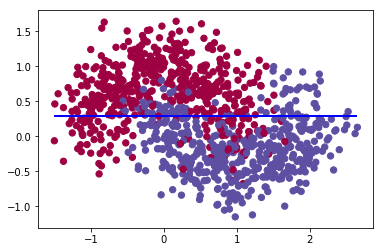

In [58]:
plt.scatter(X_cor, Y_cor, s=40, c=y, cmap=plt.cm.Spectral)
if best_stump['feature'] == 0:
    plt.vlines(x=best_stump['threshold'], ymin=min(Y_cor), ymax=max(Y_cor), linewidth=2, color='r')
else:
    plt.hlines(y=best_stump['threshold'], xmin=min(X_cor), xmax=max(X_cor), linewidth=2, color='b')
plt.show()

In [59]:
def weak_classifier(X, y, prob):
    best_stump = {}
    min_error = 100000000
    pnVSnp = 0 #pn = 0, np = 1
    for d in range(len(X[0])):
        sorted_index = np.argsort(X[:,d])
        # 0th iteration
        th0 = X[sorted_index[0]][d]
        threshold = th0
        phi0 = np.zeros(len(X))
        errorpn0 = 0
        for i in range(len(X)):
            if X[i][d] >= th0:
                phi0[i] = 1
            else:
                phi0[i] = -1
            if phi0[i] != y[i]:
                errorpn0 += prob[i]
                errornp0 = 1 - errorpn0
        if min(errorpn0,errornp0) < min_error:
            min_error = min(errorpn0,errornp0)
            min_d = d
            min_threshold = th0
            if errorpn0 < errornp0:
                min_phi = phi0
                pnVSnp = 0
            else:
                min_phi = -phi0
                pnVSnp = 1
            
        for i in range(1, len(X)):
            th = (X[sorted_index[i-1]][d] + X[sorted_index[i]][d])/2
            phi = np.zeros(len(X))
            errorpn = 0
            for j in range(len(X)):
                if X[j][d] >= th:
                    phi[j] = 1
                else:
                    phi[j] = -1
                if phi[j] != y[j]:
                    errorpn += prob[j]
                    errornp = 1 - errorpn
            if min(errorpn,errornp) < min_error:
                min_d = d
                min_error = min(errorpn,errornp)
                min_threshold = th
                if errorpn < errornp:
                    min_phi = phi
                    pnVSnp = 0
                else:
                    min_phi = -phi
                    pnVSnp = 1
        #print('[d, threshold, error]: ',[d, th, error])
        best_stump['feature'] = min_d
        best_stump['error'] = min_error
        best_stump['threshold'] = min_threshold
        best_stump['phi'] = min_phi
        best_stump['pn vs. np'] = pnVSnp
    print('[min_d, min_threshold, min_error, pn vs. np]: ',[min_d, min_threshold, min_error, pnVSnp])
    return best_stump

In [60]:
def testing(X, y, th, pnVSnp):
    test_stump = {}
    error = np.zeros(len(X[0]))
    phi = np.zeros((len(X), len(X[0])))
    for d in range(len(X[0])):
        error[d] = 0
        for i in range(len(X)):
            if pnVSnp == 0:
                if X[i][d] >= th:
                    phi[i][d] = 1
                else:
                    phi[i][d] = -1
            else:
                if X[i][d] >= th:
                    phi[i][d] = -1
                else:
                    phi[i][d] = 1
                    
            if phi[i][d] != y[i]:
                error[d] += 1
    test_stump['error'] = min(error)
    test_stump['phi'] = phi[:,np.argmin(error)]
    return test_stump

In [91]:
# Problem 1.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
w = np.ones(len(X_train))
prob = w/sum(w)
step = 60 #int(np.log(len(X)))
theta = np.zeros(step)
phi_temp = np.zeros((step, len(X_train)))
theta_phi = np.zeros(len(X_train))
phi_test_temp = np.zeros((step, len(X_test)))
theta_phi_test = np.zeros(len(X_test))
error_train = np.zeros(step)
error_test = np.zeros(step)
threshold_temp = np.zeros(step)
dimension_temp = np.zeros(step)
pnVSnp_temp = np.zeros(step)
for t in range(step):
    best_stump = weak_classifier(X_train, y_train, prob)
    w_p = 0 # w+
    w_n = 0 # w-
    phi = best_stump['phi']
    threshold_temp[t] = best_stump['threshold']
    dimension_temp[t] = best_stump['feature']
    pnVSnp_temp[t] = best_stump['pn vs. np']
    for i in range(len(y_train)):
        if phi[i] == y_train[i]:
            w_p += w[i]
        else:
            w_n += w[i]
    #=w_n = sum(w) - w_p
    theta[t] = 0.5 * np.log(w_p/max(w_n,1e-16))
    phi_temp[t][:] = phi
    theta_phi[:] += theta[t] * phi
    print('[t, w_n, theta[t]]: ', [t, w_n, theta[t]])
    
    w *= np.exp(-y_train * theta[t] * phi)
        
    error_train[t] = sum((np.sign(theta_phi) != y_train)*np.ones(len(y_train)))/len(y_train)
    
    test_stump = testing(X_test, y_test, best_stump['threshold'], pnVSnp_temp[t])
    phi_test = test_stump['phi']
    phi_test_temp[t][:] = phi_test
    theta_phi_test[:] += theta[t] * phi_test
    error_test[t] = sum((np.sign(theta_phi_test) != y_test)*np.ones(len(y_test)))/len(y_test)
    
    prob = w/sum(w)

    

[min_d, min_threshold, min_error, pn vs. np]:  [1, 0.19495, 0.19750000000001156, 1]
[t, w_n, theta[t]]:  [0, 158.0, 0.7009966353314973]
[min_d, min_threshold, min_error, pn vs. np]:  [0, -0.2946, 0.300406167435626, 0]
[t, w_n, theta[t]]:  [1, 191.35283362519968, 0.42268223851104925]
[min_d, min_threshold, min_error, pn vs. np]:  [0, 1.4424000000000001, 0.24925368442503823, 0]
[t, w_n, theta[t]]:  [2, 145.57105984825313, 0.5512983042066759]
[min_d, min_threshold, min_error, pn vs. np]:  [1, 0.6854, 0.3187244465612875, 1]
[t, w_n, theta[t]]:  [3, 161.04462212189176, 0.3798199646503142]
[min_d, min_threshold, min_error, pn vs. np]:  [1, -0.3044, 0.3607204295837523, 1]
[t, w_n, theta[t]]:  [4, 169.8637378979352, 0.28611932303344667]
[min_d, min_threshold, min_error, pn vs. np]:  [0, -0.5637, 0.3608278762110066, 0]
[t, w_n, theta[t]]:  [5, 163.18896860410703, 0.2858863674889887]
[min_d, min_threshold, min_error, pn vs. np]:  [0, 1.6666, 0.37612435736551725, 0]
[t, w_n, theta[t]]:  [6, 163.3

[min_d, min_threshold, min_error, pn vs. np]:  [0, 1.09355, 0.46601124839250047, 0]
[t, w_n, theta[t]]:  [55, 128.94684667841952, 0.06808250115862555]
[min_d, min_threshold, min_error, pn vs. np]:  [1, 0.9957, 0.4617617369082109, 1]
[t, w_n, theta[t]]:  [56, 127.47543992540237, 0.07662614662546184]
[min_d, min_threshold, min_error, pn vs. np]:  [1, -0.3044, 0.46344932739149536, 1]
[t, w_n, theta[t]]:  [57, 127.56663036887473, 0.07323197746972356]
[min_d, min_threshold, min_error, pn vs. np]:  [0, 0.9626, 0.46869997288641363, 1]
[t, w_n, theta[t]]:  [58, 128.6667264393856, 0.06268201870463133]
[min_d, min_threshold, min_error, pn vs. np]:  [0, 0.6745, 0.4687747110339161, 0]
[t, w_n, theta[t]]:  [59, 128.43484826960528, 0.06253195575095531]


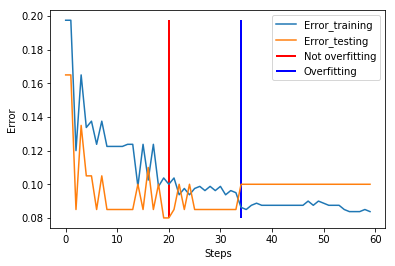

In [96]:
plt.plot(np.linspace(0, step-1, step), error_train)
plt.plot(np.linspace(0, step-1, step), error_test)
plt.vlines(x=20, ymin=min(min(error_train), min(error_test)), ymax=max(max(error_train), max(error_test)), linewidth=2, color='r')
plt.vlines(x=34, ymin=min(min(error_train), min(error_test)), ymax=max(max(error_train), max(error_test)), linewidth=2, color='b')
plt.legend(('Error_training', 'Error_testing', 'Not overfitting', 'Overfitting'))
plt.ylabel('Error')
plt.xlabel('Steps')
plt.show()

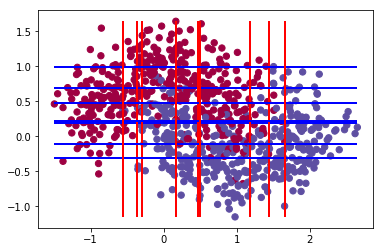

In [97]:
# small number of decision stumps
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)
for i in range(20):
    if dimension_temp[i] == 0:
        plt.vlines(x=threshold_temp[i], ymin=min(Y_cor), ymax=max(Y_cor), linewidth=2, color='r')
    else:
        plt.hlines(y=threshold_temp[i], xmin=min(X_cor), xmax=max(X_cor), linewidth=2, color='b')

plt.show()

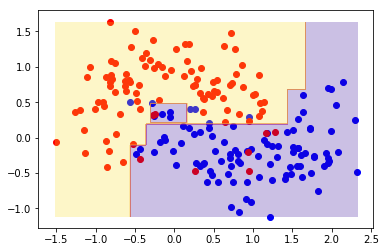

Refered from the link on Piazza ans collaborated with Chun-Yen Liu


In [101]:
# Small number of decision stumps
X_feature0 = X_test[:,0]
X_feature1 = X_test[:,1]
X_p = np.where(y_test==1)[0]
X_n = np.where(y_test==-1)[0]

h = 0.01
xx, yy = np.meshgrid(np.arange(min(X_test[:,0]), max(X_test[:,0]), h),
                     np.arange(min(X_test[:,1]), max(X_test[:,1]), h))
f = 0*xx
r = 0*xx+1
for i in range(20):
    if dimension_temp[i] == 0:
        if pnVSnp_temp[i] == 1:
            f += theta[i]
            f[:,np.where(xx[0,:]<=threshold_temp[i])[0]] -= 2*theta[i]
            r = np.sign(f)
        else:
            f += theta[i]
            f[:,np.where(xx[0,:]>threshold_temp[i])[0]] -= 2*theta[i]
            r = np.sign(f)
    else:
        if pnVSnp_temp[i] == 1:
            f += theta[i]
            f[np.where(yy[:,0]<=threshold_temp[i])[0],:] -= 2*theta[i]
            r = np.sign(f)
        else:
            f += theta[i]
            f[np.where(yy[:,0]>threshold_temp[i])[0],:] -= 2*theta[i]
            r = np.sign(f)
            
plt.scatter(X_feature0[X_p], X_feature1[X_p],color = 'b', label='y=1')
plt.scatter(X_feature0[X_n], X_feature1[X_n],color = 'r', label='y=-1')
plt.contourf(xx, yy, r, alpha=.25, cmap=plt.cm.plasma)
plt.show()
print('Refered from the link on Piazza ans collaborated with Chun-Yen Liu')

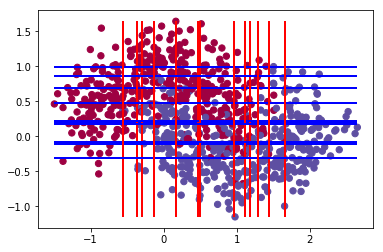

In [99]:
# large number of decision stumps that overfits
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)
for i in range(34):
    if dimension_temp[i] == 0:
        plt.vlines(x=threshold_temp[i], ymin=min(Y_cor), ymax=max(Y_cor), linewidth=2, color='r')
    else:
        plt.hlines(y=threshold_temp[i], xmin=min(X_cor), xmax=max(X_cor), linewidth=2, color='b')

plt.show()

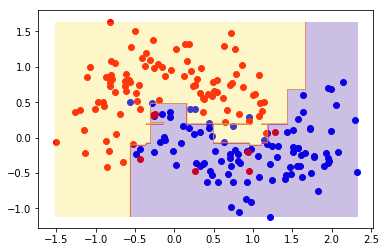

In [100]:
# large number of decision stumps that overfits
X_feature0 = X_test[:,0]
X_feature1 = X_test[:,1]
X_p = np.where(y_test==1)[0]
X_n = np.where(y_test==-1)[0]

h = 0.01
xx, yy = np.meshgrid(np.arange(min(X_test[:,0]), max(X_test[:,0]), h),
                     np.arange(min(X_test[:,1]), max(X_test[:,1]), h))
f = 0*xx
r = 0*xx+1
for i in range(34):
    if dimension_temp[i] == 0:
        if pnVSnp_temp[i] == 1:
            f += theta[i]
            f[:,np.where(xx[0,:]<=threshold_temp[i])[0]] -= 2*theta[i]
            r = np.sign(f)
        else:
            f += theta[i]
            f[:,np.where(xx[0,:]>threshold_temp[i])[0]] -= 2*theta[i]
            r = np.sign(f)
    else:
        if pnVSnp_temp[i] == 1:
            f += theta[i]
            f[np.where(yy[:,0]<=threshold_temp[i])[0],:] -= 2*theta[i]
            r = np.sign(f)
        else:
            f += theta[i]
            f[np.where(yy[:,0]>threshold_temp[i])[0],:] -= 2*theta[i]
            r = np.sign(f)
            
plt.scatter(X_feature0[X_p], X_feature1[X_p],color = 'b', label='y=1')
plt.scatter(X_feature0[X_n], X_feature1[X_n],color = 'r', label='y=-1')
plt.contourf(xx, yy, r, alpha=.25, cmap=plt.cm.plasma)
plt.show()